# Regularized Logistic Regression 
在这个实验中，我们将通过对比未进行正则化的Logistic回归与正则化的Logistic回归在相同数据集上的表现来理解正则化缓解过拟合现象的作用。
## 1. 导入Python库
首先，我们导入这次实验所需要使用的Python库

In [1]:
import numpy as np
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt

## 2. 可视化数据
接下来，我们导入这次实验需要用到的数据，并且对其进行可视化。  
设$X$为我们的特征矩阵，$x^{(i)}$为训练集里面的第$i$个样本，$x_j$为样本中的第$j$个特征，则：  
$$X=\begin{bmatrix}x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)} \end{bmatrix}$$  
$Y$为一个列向量，$y^{(i)}$代表第$i$个样本对应的标签，则：  
$$Y=\begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix}$$  


The shape of X is: (100, 2)
The shape of Y is: (100, 1)


<module 'matplotlib.pyplot' from 'E:\\Scoop\\apps\\miniconda3\\current\\envs\\ML_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

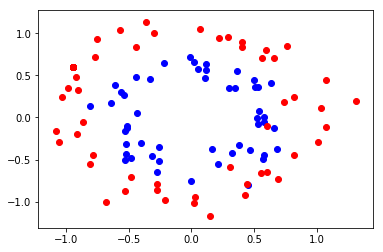

In [2]:
data = np.loadtxt('circle_data.txt', delimiter=' ')
X = data[:, 0:2].reshape(-1,2)
Y = data[:, 2].reshape(-1,1)

print("The shape of X is:", X.shape)
print("The shape of Y is:", Y.shape)

def plotData(X, y):
    # Find Indices of Positive and Negative Examples
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos,0], X[pos,1], c='b')
    plt.scatter(X[neg,0], X[neg,1], c='r')
    plt.savefig('./oringnal_data.png')
    return plt
plotData(X, Y)

## 3. Sigmoid函数
我们打算使用Logistic回归训练一个模型，来区分我们的正类与负类，因此我们需要一个Sigmoid函数：  
$$sigmoid(z) = \frac{1}{1+e^{-z}}$$
**注意**：我们写的Sigmoid函数是需要能够对矩阵直接进行操作的。  
**Hint**：计算$e^{-z}$可以使用np.exp(-z)来进行计算  
**任务1**：实现sigmoid函数

In [3]:
def sigmoid(z):
    """
    对矩阵z中每个元素计算其Sigmoid函数值
    """
    ### START CODE HERE ###
    
    g = 1/(1+np.exp(-z))
    
    ### END CODE HERE ###
    return g

#测试一下我们的sigmoid函数是否正确，运行下列代码
print(sigmoid(X[1,:]))

[0.41095957 0.7558389 ]


## 3. Feature mapping
这次实验只选取了两个特征$x_1$和$x_2$，为了能够得到更加复杂的拟合曲线，我们需要通过这两个特征映射出更多的特征，具体方法是将这两个特征映射所有$x_1$和$x_2$的不超过6次方的多项式中，即：  
$$mapFeature(x_1,x_2)=\begin{bmatrix}1 \\ x_1 \\ x_2 \\ x_1^2 \\ x_1x_2 \\ x_2^2 \\ \vdots \\ x_1x_2^5 \\ x_2^6 \end{bmatrix}$$  

In [4]:
def mapFeature(X1, X2):
    """
    特征映射函数，从X1和X2中映射出更多特征
    """
    degree = 6    #最高为6次幂
    newX = np.ones((X1.shape[0], sum(range(degree + 2))))    #初始化新的特征矩阵
    end = 1
    for i in range(1, degree + 1):
        for j in range(0, i+1):
            newX[:, end] = np.multiply(np.power(X1, i-j), np.power(X2, j))
            end = end + 1
    return newX

运行下面的代码对输入$X$中的两个特征进行特征映射，我们可以检查newX的维度来确认是否正确。   

In [5]:
newX = mapFeature(X[:, 0], X[:, 1])
print("After mapping the features, the shape of newX is:", newX.shape)

After mapping the features, the shape of newX is: (100, 28)


## 4. 计算成本与梯度
首先，我们初始化权重$\theta$为零向量。  
$$\theta = \begin{bmatrix}\theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} $$  
其中$n$为特征的数量。  
**Hint**：使用np.zeros()  
**任务2**：初始化权重$\theta$为零向量。 

In [6]:
#初始化theta为零向量
### START CODE HERE ###

initial_theta = np.zeros((newX.shape[1],1))

### END CODE HERE ###
print("The initialized theta's shape is:", initial_theta.shape)

The initialized theta's shape is: (28, 1)


接下来，我们需要计算成本与梯度，回忆一下我们上课学过的内容，加入了正则化的成本函数为：  
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{[y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$  
其中，$$h_\theta(X)=g(X\theta)\\ g(z) = sigmoid(z)$$
$\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$是正则化项。注意到在上述公式中，我们不需要对$\theta_0$的权重进行惩罚，所以索引$j$从1开始。  
然后梯度的计算公式为：  
$$\frac{\partial J(\theta)}{\partial \theta_0}= \frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{0}^{(i)}}\qquad j=0$$  
$$\frac{\partial J(\theta)}{\partial \theta_j}=  \big(\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}}\big)+\frac{\lambda}{m}\theta_{j} \quad j\in\left\{ 1,2,...n \right\}$$  
**Hint**：这些函数或许可以帮助你：np.dot(),np.log(),np.power(),sum().  
**任务3**：完成成本函数后，计算一下初始为零向量的$\theta$所对应的成本与梯度值。

In [7]:
def costFunctionReg(X, y, theta, lambd):
    """
    计算成本J与梯度grad
    :param theta:权重矩阵theta
    :param X:特征矩阵X
    :param y:特征矩阵X对应的标签
    :param lambd:正则化参数lambda
    :return:成本与梯度
    """
    ### START CODE HERE ###
    
    m = X.shape[0]

    h = sigmoid(np.dot(X,theta))
    J = -1/m*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))+lambd/(2*m)*np.dot(theta[1:-1].T,theta[1:-1])

    grad = 1/m*np.dot(X.T,h-y)+lambd/m*theta
    grad[0] = 1/m*np.dot(X[:,0].T,h-y)
    
    ### END CODE HERE ###
    
    return J, grad

#我们来计算一下初始为零向量的theta所对应的成本与梯度值（先不加入正则化项，即lambda = 0）  
initial_J, initial_grad = costFunctionReg(newX, Y, initial_theta, lambd = 0)
print("The cost is:", initial_J)
print("The 5th element of the gradient is:", initial_grad[4])

The cost is: [[0.69314718]]
The 5th element of the gradient is: [-0.0003]


## 5. 更新参数$\theta$
参数$\theta$更新的公式为：  
$$\theta_{0} := \theta_{0} - \alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{0}^{(i)}}$$  
$$\theta_{j} := \theta_{j} - \alpha \left[ (\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}})+\frac{\lambda}{m}\theta_{j} \right] \quad j\in\left\{ 1,2,...n \right\}$$    
**任务4**：完成参数更新函数后，计算第一次更新参数后的值

In [8]:
def Update_Parameter(theta, gradients, learning_rate = 0.5):
    """
    更新参数theta
    :param theta:权重theta
    :param gradients:梯度值
    :param learning_rate:学习速率
    :return:更新后的theta
    """
    ### START CODE HERE ###
    
    theta = theta-learning_rate*gradients
    
    ### END CODE HERE ###
    return theta

#我们试着利用刚才计算得到的梯度值更新我们的参数theta
print("After update theta, now, the 5th element of theta will be:", Update_Parameter(initial_theta,  initial_grad)[4])

After update theta, now, the 5th element of theta will be: [0.00015]


## 6. 定义模型
接下来，我们将上面的代码整合到我们的模型Model中，并且我们将记录下成本$J$的变化过程。  
**任务5**：完成模型函数后，训练一个未进行正则化的模型。

At the end, the value of theta is: [[ 10.92684225]
 [-20.64469113]
 [ 11.70285305]
 [  5.19373709]
 [ -2.72691864]
 [  3.41591945]
 [ 24.33746965]
 [ -8.12640635]
 [ 19.63826443]
 [ -1.59114548]
 [-15.47811361]
 [-23.36745523]
 [-19.62744014]
 [  7.03009213]
 [-23.61286047]
 [ -1.0856438 ]
 [ -5.43424656]
 [  1.69097694]
 [ 26.9445191 ]
 [  9.99106393]
 [-29.08982137]
 [-31.69505963]
 [ -6.17126184]
 [-11.34331387]
 [ 16.48071022]
 [-30.85203617]
 [-26.35879506]
 [-15.4340745 ]]


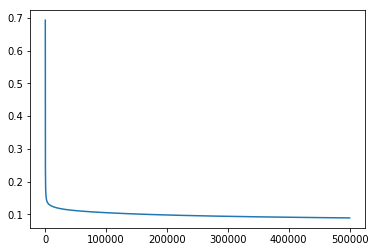

In [9]:
def Model(X, y, theta, iteration=500000, learning_rate = 0.5, lambd = 1):
    """
    Regulared Logistic Regression Model
    :param X:输入X
    :param y:标签Y
    :param theta:参数theta
    :param iteration:迭代次数
    :param learning_rate:学习率
    :return:成本J的历史记录J_history和最终theta的值
    """
    J_history = []

    for i in range(iteration):
        ### START CODE HERE ###
        
        J , grad = costFunctionReg(X=X,lambd=lambd,theta=theta,y=y)
        theta = Update_Parameter(gradients=grad,learning_rate=learning_rate,theta=theta)
        
        ### END CODE HERE ###
        J_history.append(J)
        
    return J_history, theta

#我们先训练一个未进行正则化的模型，训练过程可能会花费一定的时间。  
#初始化theta
### START CODE HERE ###

theta = initial_theta
#对模型进行训练
J_history, theta = Model(newX,Y,theta,lambd=0)

### END CODE HERE ###
#输出最终的theta值
print("At the end, the value of theta is:", theta)
#绘制出成本值的历史曲线
plt.plot(np.array(J_history).flatten())
plt.savefig('./J_history1.png')
plt.show()

## 7. 绘制决策边界
下面的代码直接运行即可

In [10]:
def plotDecisionBoundary(theta, X, y, image):
    plt = plotData(newX[:, 1:3], y)
    
    u = np.linspace(-1.5, 1.5, 100)
    v = np.linspace(-1.5, 1.5, 100)

    z = np.zeros((len(u), len(v)))
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])), theta)
    z = np.transpose(z) 
    p3 = plt.contour(u, v, z, levels=[0]).collections[0]
    filename = 'boundary' + str(image) + '.png'
    plt.savefig(filename)
    plt.show()
    return plt

我们绘制出刚才训练好的未进行正则化的模型的决策边界。  

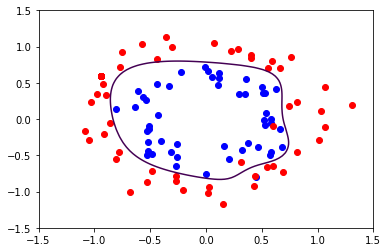

<module 'matplotlib.pyplot' from 'E:\\Scoop\\apps\\miniconda3\\current\\envs\\ML_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
plotDecisionBoundary(theta, X, Y, 1)

## 8. 训练正则化的模型
接下来我们训练一个正则化的Logistic Regression模型，我们将$\lambda$设置为1  
**任务6**：训练正则化的模型

At the end, the value of theta is: [[ 2.37567971]
 [-0.31652489]
 [ 0.33218067]
 [-1.85291326]
 [-0.23318039]
 [-1.91728406]
 [ 0.12472457]
 [-0.10630029]
 [-0.07032321]
 [-0.02447155]
 [-1.61288943]
 [-0.0453994 ]
 [-0.78465724]
 [-0.17213027]
 [-1.6978012 ]
 [ 0.26380458]
 [-0.06920797]
 [ 0.02886525]
 [-0.10267502]
 [-0.03739116]
 [-0.15788666]
 [-1.31987838]
 [ 0.02268086]
 [-0.38598843]
 [ 0.00754947]
 [-0.44850482]
 [-0.15893777]
 [-1.34973308]]


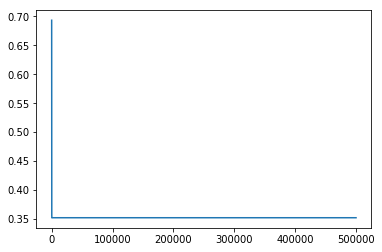

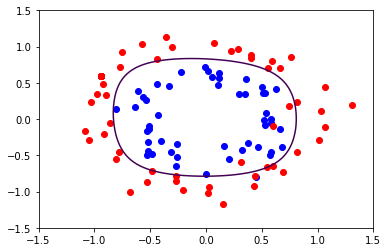

<module 'matplotlib.pyplot' from 'E:\\Scoop\\apps\\miniconda3\\current\\envs\\ML_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
#初始化theta
### START CODE HERE ###

theta = initial_theta
#对模型进行训练
J_history, theta = Model(newX,Y,theta)

### END CODE HERE ###
#输出最终的theta值
print("At the end, the value of theta is:", theta)
#绘制出成本值的历史曲线
plt.plot(np.array(J_history).flatten())
plt.savefig('./J_history2.png')
plt.show()
#绘制出决策边界
plotDecisionBoundary(theta, X, Y, 2)

## 总结
我们对比一下上面的两个决策边界，未进行正则化的模型曲线看起来十分复杂，似乎是有意的框出这两种不同颜色的点，虽然过拟合的模型能够在训练集上获得更高的准确率，但是这种模型的泛化能力往往很不理想。反过来，我们看进行了正则化的模型，它的曲线似乎圆润了许多，因此泛化能力要更好些。  
通过这次实验，我们能够清晰的理解正则化对于缓解过拟合现象所起到的作用。在提交完作业后，你还可以试试不同的$\lambda$值，观察决策边界的变化。